# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Displaying URL from openweather
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + "London").json()
response

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 56.41,
  'feels_like': 48.99,
  'temp_min': 55,
  'temp_max': 57.99,
  'pressure': 1017,
  'humidity': 47},
 'visibility': 10000,
 'wind': {'speed': 8.05, 'deg': 60},
 'clouds': {'all': 6},
 'dt': 1587500652,
 'sys': {'type': 1,
  'id': 1414,
  'country': 'GB',
  'sunrise': 1587444670,
  'sunset': 1587496005},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [16]:
# Displaying URL from openweather
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + "London").json()
response

# Capture city information
data = []

# set up lists to hold reponse info
city_name = []
cloudiness_data = []
Humidity_data = []
Wind_Speed_data = []
temp_max_data = []
Date_data = []
Country_data = []
Lat_data = []
Long_data = []

# Loop through the list of cities and perform a request for data on each
  #cloudiness, Humidity, Wind_Speed, temp_max, Date, Country, Lat, Long
i = 0
for city in cities[:500]:
    response = requests.get(query_url + city).json()
    i= i + 1
    try:
        
        Cloudiness = response["clouds"]["all"]        
        Humidity = response["main"]["humidity"]      
        Wind_Speed = response["wind"]["speed"]
        temp_max = response["main"]["temp_max"]
        Date = response["dt"]
        Country = response["sys"]["country"]
        Lat = response["coord"]["lat"]
        Long = response["coord"]["lon"]
        
        cloudiness_data.append(Cloudiness)
        Humidity_data.append(Humidity)
        Wind_Speed_data.append(Wind_Speed)
        temp_max_data.append(temp_max)
        Date_data.append(Date)
        Country_data.append(Country)
        Lat_data.append(Lat)
        Long_data.append(Long)
        city_name.append(city)
        
        #Print the cities name
        print(f"{i} {city}")
        
        #Create interval of .2 seconds
        time.sleep(.2)
   
    #If city not found then print error message
    except:
        print("City not found")

1 rikitea
2 punta arenas
3 sur
4 alofi
5 weiden
6 ushuaia
7 abha
8 butaritari
9 arraial do cabo
10 avarua
11 albany
12 bluff
13 mataura
14 beringovskiy
15 dicabisagan
City not found
17 santiago
18 tasiilaq
City not found
20 nome
21 bengkulu
22 yakima
23 iquique
24 omihachiman
25 port keats
26 kaohsiung
27 hobart
28 ola
29 busselton
30 asilah
31 east london
City not found
City not found
34 victoria
35 barao de melgaco
36 san patricio
37 araouane
38 alice springs
39 kununurra
40 lasa
41 namibe
42 chuy
43 puerto ayora
44 bredasdorp
45 wakkanai
46 torbay
47 rio grande
48 ossora
49 provideniya
50 vaini
City not found
52 ipixuna
City not found
54 tuktoyaktuk
55 evensk
56 barsovo
57 tres arroyos
58 thompson
59 jumla
60 dullewala
61 hilo
62 sainte-marie
63 ribeira grande
64 yantarnyy
65 lysyye gory
City not found
67 nanortalik
68 port augusta
69 brae
70 nemuro
71 nogliki
72 ancud
73 george
74 broken hill
75 atuona
76 sitka
77 kapaa
78 saskylakh
79 ocampo
80 yellowknife
81 upernavik
82 champasa

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
# create a data frame from city, cloudiness, humidity, wind speed, max temperature, date, country, latitude, longitude
download_data_dict = {
    'city' : city_name,
    'Cloudiness' : cloudiness_data,
    'Humidity': Humidity_data,
    'Wind Speed' : Wind_Speed_data,
    'Temp Max': temp_max_data,
    'Date': Date_data,
    'Country': Country_data,
    'Latitude': Lat_data,
    'Longitude': Long_data}

# Create DataFrame
download_data = pd.DataFrame(download_data_dict)


#Create new csv with export of city
download_data.to_csv('Download_weather_data.csv')
download_data.head()

,city,Cloudiness,Humidity,Wind Speed,Temp Max,Date,Country,Latitude,Longitude
0,rikitea,55,73,7.38,77.45,1587507746,PF,-23.12,-134.97
1,punta arenas,89,53,44.96,50.00,1587507505,CL,-53.15,-70.92
2,sur,89,39,10.45,87.28,1587507680,OM,22.57,59.53
3,alofi,75,66,13.87,84.20,1587507747,NU,-19.06,-169.92
4,weiden,1,43,8.05,50.00,1587507747,DE,49.68,12.16


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

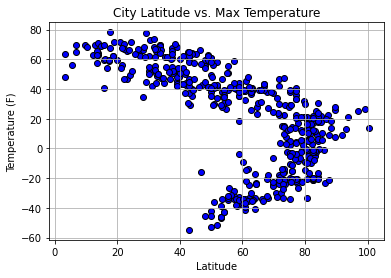

As the latitude increases the weather starts to increase as well


In [18]:
# Build a scatter plot for each data type
plt.scatter(download_data["Temp Max"], download_data["Latitude"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevs.MaxTemp.png")

# Show plot
plt.show()

print(f"As the latitude increases the weather starts to increase as well")

#### Latitude vs. Humidity Plot

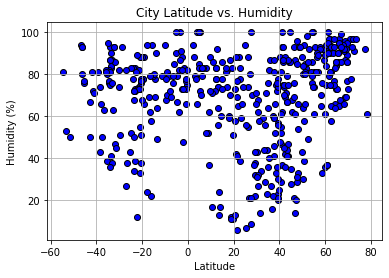

Based on latitude from -60 to 80, the humidity percentage tends to increase


In [19]:
# Build a scatter plot for each data type
plt.scatter(download_data["Latitude"], download_data["Humidity"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevs.Humidity.png")

# Show plot
plt.show()

print(f"Based on latitude from -60 to 80, the humidity percentage tends to increase")

#### Latitude vs. Cloudiness Plot

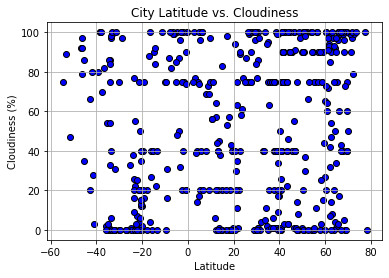

Based on the visualization above, the cloudiness percentage does not actually make a factor with Latitude
There is no increse or decrease in cloudiness based in what city you are in


In [20]:
# Build a scatter plot for each data type
plt.scatter(download_data["Latitude"], download_data["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevs.Cloudiness.png")

# Show plot
plt.show()

print(f"Based on the visualization above, the cloudiness percentage does not actually make a factor with Latitude")
print(f"There is no increse or decrease in cloudiness based in what city you are in")

#### Latitude vs. Wind Speed Plot

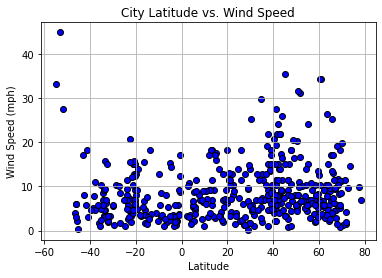

Based on the visualization above, the wind speed is about the same for all the cities, except a few one
Most of the cities wind speed does not get above 20 mph


In [21]:
# Build a scatter plot for each data type
plt.scatter(download_data["Latitude"], download_data["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevs.WindSpeed.png")

# Show plot
plt.show()

print(f"Based on the visualization above, the wind speed is about the same for all the cities, except a few one")
print(f"Most of the cities wind speed does not get above 20 mph")

## Linear Regression

In [22]:
# create a data frame from city, cloudiness, humidity, wind speed, max temperature, date, country, latitude, longitude
download_data_dict = {
    'city' : city_name,
    'Cloudiness' : cloudiness_data,
    'Humidity': Humidity_data,
    'Wind Speed' : Wind_Speed_data,
    'Temp Max': temp_max_data,
    'Date': Date_data,
    'Country': Country_data,
    'Latitude': Lat_data,
    'Longitude': Long_data}

#Create DataFrame
cities_df = pd.DataFrame(download_data_dict)
cities_df.head()

,city,Cloudiness,Humidity,Wind Speed,Temp Max,Date,Country,Latitude,Longitude
0,rikitea,55,73,7.38,77.45,1587507746,PF,-23.12,-134.97
1,punta arenas,89,53,44.96,50.00,1587507505,CL,-53.15,-70.92
2,sur,89,39,10.45,87.28,1587507680,OM,22.57,59.53
3,alofi,75,66,13.87,84.20,1587507747,NU,-19.06,-169.92
4,weiden,1,43,8.05,50.00,1587507747,DE,49.68,12.16


In [23]:
#Define northern and southern hemispheres
northern_hemisphere = cities_df.loc[cities_df["Latitude"] >= 0.0]
northern_hemisphere.reset_index(inplace=True)

southern_hemisphere = cities_df.loc[cities_df["Latitude"] <=0.0]
southern_hemisphere.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

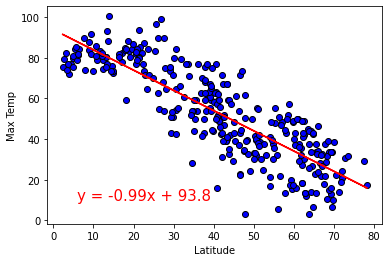

In [24]:
# Creating a scatter plot and adding linear regression and comparing northern hemisphere Max Temp vs. Latitude
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Temp Max']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Save the figure
plt.savefig("Maxtempvs.latitude.png")

#Show plo
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

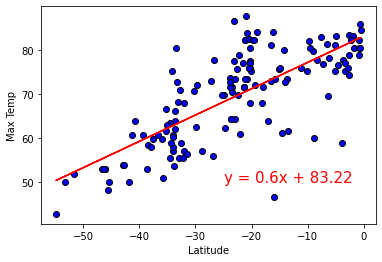

In [25]:
# Creating a scatter plot and adding linear regression and comparing southern hemisphere Max Temp vs. Latitude
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Temp Max']

# Formula for slope of a line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Save the figure
plt.savefig("southernMaxtempvs.latitude.png")

#Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

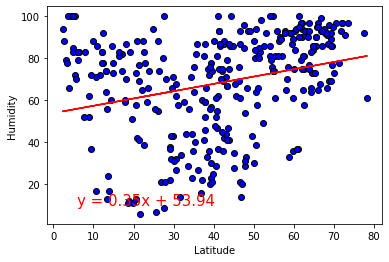

In [26]:
# Creating a scatter plot and adding linear regression and comparing northern hemisphere humidity vs. Latitude
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("Humidityvs.latitude.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

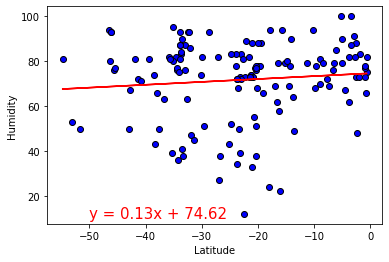

In [27]:
# Creating a scatter plot and adding linear regression and comparing southern hemisphere humidity vs. Latitude
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("southern humidity vs.latitude.png")

# Show Plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

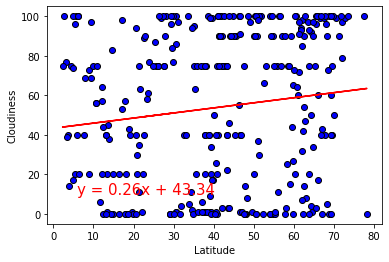

In [28]:
# Creating a scatter plot and adding linear regression and comparing northern hemisphere cloudiness vs. Latitude
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("Cloudiness vs.latitude.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

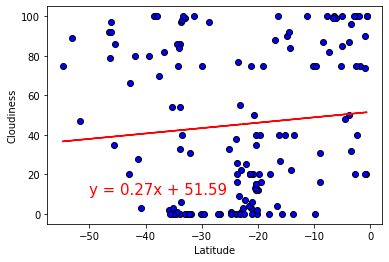

In [29]:
# Creating a scatter plot and adding linear regression and comparing southern cloudiness vs. Latitude
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("southern Cloudiness vs.latitude.png")

# Show Plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

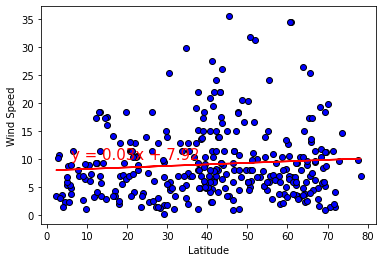

In [30]:
# Creating a scatter plot and adding linear regression and comparing northern hemisphere Wind Speen vs. Latitude
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("Wind Speed vs.latitude.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

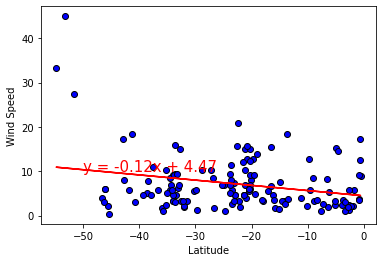

In [31]:
# Creating a scatter plot and adding linear regression and comparing southern hemisphere Wind Speed vs. Latitude
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("southern Wind Speed vs.latitude.png")

# Show plot
plt.show()